# 1. COLLECTED DATA
Avaibility data quantity and quality control 

In [ ]:
#Scikit-learn: a Python tool for data preprocessing, model training, and evaluation.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import os

# Use os for make a root
data_path = os.path.join("..", "..", "..", "..", "backend", "data", "covid_processed.csv")
data = pd.read_csv(data_path, sep=',')

data.head(10)

In [ ]:
# Informations about data type and length
data.info()

In [ ]:
# Checking all the missing value in the data 
data.isnull().sum()

In [ ]:
#comparatifvisualition on a diagram NaN values
msno.bar(data) 

In [ ]:
# Drop column not usable
dataClean = data.drop(columns=['icu_patients', 'hosp_patients', 'total_vaccinations', 'people_vaccinated'])

In [ ]:
dataClean.head()

In [ ]:
#comparatifvisualition on a diagram NaN values
msno.bar(dataClean) 

In [ ]:
# percent of missingg or null values
(dataClean.isnull().mean() * 100).sort_values(ascending=False)

In [ ]:
# Encodage
dataClean["date"] = pd.to_datetime(dataClean["date"], errors='coerce')

dataClean["location_encoded"] = LabelEncoder().fit_transform(dataClean["location"])
dataClean["day"] = dataClean["date"].dt.day
dataClean["month"] = dataClean["date"].dt.month
dataClean["year"] = dataClean["date"].dt.year

# Phase 0 = épidémie "classique" ; Phase 1 = post-crise (baisse mortalité)
dataClean["epidemic_phase"] = dataClean["year"].apply(lambda y: 0 if y <= 2022 else 1)


X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = dataClean["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))

In [ ]:
print("Importances des features :", model.feature_importances_)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux : {mae/mean_real:.2%}")

## Split par date une semaine

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-07")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux pour une semaine : {mae/mean_real:.2%}")

## Split par date deux semaines

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-14")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux pour deux semaines  : {mae/mean_real:.2%}")

## Split par date un mois

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative pour un mois : {mae/mean_real:.2%}")

In [ ]:
dataClean['location'].value_counts().head(20)

## Split par date cas mondiaux 

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-07")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))


In [ ]:
print("Moyenne des décès réels :", y_test.mean())
print("Médiane des décès réels :", y_test.median())

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative split par date cas mondiaux 7 jours janvier 2021 : {mae/mean_real:.2%}")

## Exprimer au modèle la tendance ascendante et descandante des varations

In [ ]:
# Ajouter features pour apprendre au modèle l'indicateur des tendances de variations éppidémique
dataClean['days_since_start'] = (dataClean['date'] - dataClean['date'].min()).dt.days
dataClean['new_cases_rolling7'] = dataClean['new_cases'].rolling(window=7).mean()
dataClean['trend_new_cases'] = dataClean['new_cases'].diff(periods=7)

In [ ]:
# Ajoute les nouvelles colonnes dans X
X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]


# Supprimer toutes les lignes où X ou y contient NaN (important à cause des rolling/diff)
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

# Split, entraînement et prédiction comme avant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))

In [ ]:
print("Moyenne des décès réels :", y_test.mean())
print("Médiane des décès réels :", y_test.median())

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

## Split par date une semaine nouvelles features

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-07")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

## Split par date deux semaines nouveau DataFrame

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-14")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

## Split par date 1 mois nouveau DataFrame

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-02-01")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

## Split année 2021

In [ ]:

# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-14")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features année 2021 : {mae/mean_real:.2%}")

In [ ]:
# Analyse sur les 3 mois avec le plus de décès

dataClean['month_year'] = dataClean['date'].dt.to_period('M')
top_months = dataClean.groupby('month_year')['new_deaths'].sum().sort_values(ascending=False).head(3).index

for period in top_months:
    start = period.start_time
    end = period.end_time
    data_short = dataClean[(dataClean["date"] >= start) & (dataClean["date"] <= end)]

    X = data_short[[
        "total_cases", "location_encoded", "day", "month", "year",
        "total_deaths", "new_cases", "days_since_start", "new_cases_rolling7", "trend_new_cases", "epidemic_phase"
    ]]
    y = data_short["new_deaths"]

    Xy = pd.concat([X, y], axis=1).dropna()
    X = Xy[X.columns]
    y = Xy[y.name]

    if len(X) > 0 and len(y.unique()) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\nPériode : {period}")
        print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
        print("Coefficient de qualité :", r2_score(y_test, y_pred))
        print(f"Erreur relative : {mean_absolute_error(y_test, y_pred)/y_test.mean():.2%}")
    else:
        print(f"\nPériode : {period} -- Pas assez de données pour entraîner le modèle.")

## Split sur l'année 2022 nouveau DataFrame

In [39]:
#filtrer sur 2022
data_short = dataClean[(dataClean["date"] >= "2022-01-01") & (dataClean["date"] <= "2022-12-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = data_short[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features année 2022 : {mae/mean_real:.2%}")

Moyenne erreur pred et test : 10.745907090736923
Coefficient de qualité : 0.9576746152270582
Erreur relative cas mondiaux avec nouvelles features année 2022 : 21.50%


## Split sur l'année 2023 nouveau DataFrame

In [40]:
#filtrer sur 2023
data_short = dataClean[(dataClean["date"] >= "2023-01-01") & (dataClean["date"] <= "2023-12-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = data_short[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative  cas mondiaux année 2023 : {mae/mean_real:.2%}")

Moyenne erreur pred et test : 7.266508739391895
Coefficient de qualité : 0.7317033223809807
Erreur relative  cas mondiaux année 2023 : 48.66%


In [41]:
# Afficher la première et la dernière date de 2023 dans les données pour vérifier 
# si elles couvrent bien l'année complète
dates_2023 = dataClean[dataClean["year"] == 2023]["date"]
print("Première date 2023 :", dates_2023.min())
print("Dernière date 2023 :", dates_2023.max())
print("Nombre de jours de données en 2023 :", dates_2023.nunique())

Première date 2023 : 2023-01-01 00:00:00
Dernière date 2023 : 2023-12-31 00:00:00
Nombre de jours de données en 2023 : 365


In [42]:
# Vérifier l'équilibrage des données par année pour essayer de comprendre 
# L'erreur relative de l'année 2023
features = [
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]

target = "new_deaths"

# Supprimer les lignes où une des colonnes est NaN
data_filtered = dataClean[features + [target]].dropna()

# Ajouter une colonne 'year' si elle n'existe pas encore
if 'year' not in data_filtered.columns:
    data_filtered['year'] = pd.to_datetime(dataClean['date']).dt.year

# Compter le nombre de lignes par année
volume_par_annee = data_filtered.groupby('year').size()
print(volume_par_annee)


year
2020    88777
2021    89781
2022    89764
2023    88964
2024    52504
dtype: int64


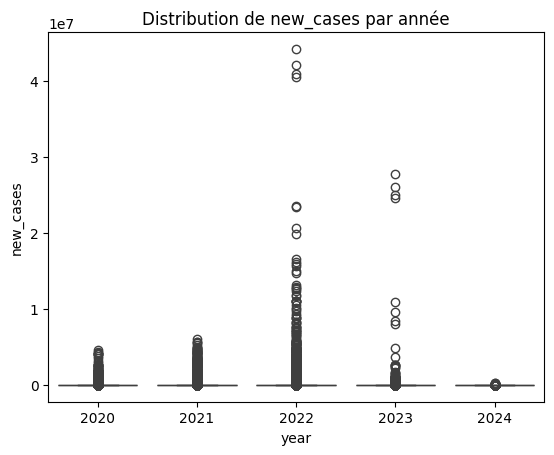

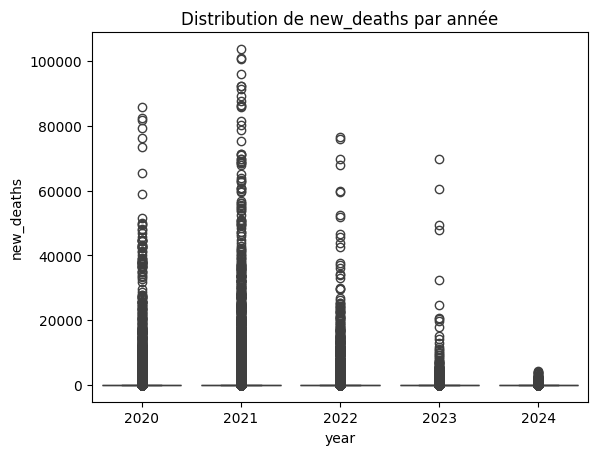

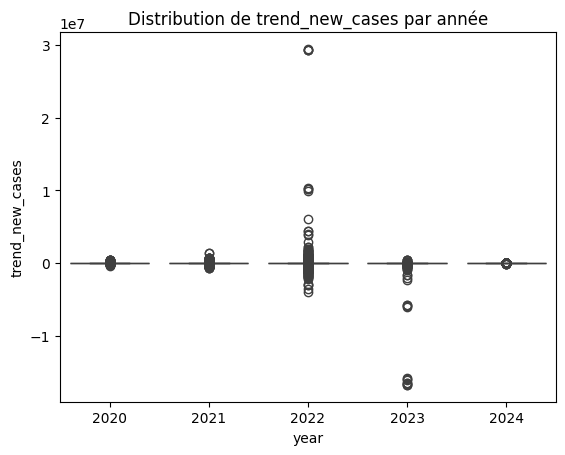

In [43]:
# Matrice pour vérfier les distributions de ces trois colonnes par année
for col in ["new_cases", "new_deaths", "trend_new_cases"]:
    sns.boxplot(data=dataClean, x=dataClean['year'], y=col)
    plt.title(f"Distribution de {col} par année")
    plt.show()

In [44]:
vacc_cols = ["total_vaccinations", "people_vaccinated"]

for col in vacc_cols:
    data['year'] = pd.to_datetime(data['date']).dt.year
    yearly_counts = data[data[col].notna()].groupby("year")[col].count()
    print(f"\nPrésence de {col} par année :")
    print(yearly_counts)



Présence de total_vaccinations par année :
year
2020      379
2021    38490
2022    29708
2023    13084
2024     3756
Name: total_vaccinations, dtype: int64

Présence de people_vaccinated par année :
year
2020      373
2021    36777
2022    28300
2023    12314
2024     3368
Name: people_vaccinated, dtype: int64


In [45]:
## On comprend que 2023 est une année atypique au niveau de la variation cas de covid et décès, 
## Et on ne peut pas attester que ce soit grâce à la vaccination car on a trop peut de donnée vaccinale

## Split sur l'année 2024 nouveau DataFrame

In [46]:
#filtrer sur 2024
data_short = dataClean[(dataClean["date"] >= "2024-01-01") & (dataClean["date"] <= "2024-12-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = data_short[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))

Moyenne erreur pred et test : 0.8590334253880582
Coefficient de qualité : 0.912194797657868


In [47]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux année 2024 : {mae/mean_real:.2%}")

Erreur relative cas mondiaux année 2024 : 27.77%
